In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=1200

import numpy as np
import yfinance as yf # pip install yfinance
import statsmodels.api as sm

import datetime as dt
#pip install arch
from arch import arch_model

In [2]:
start = dt.date(2019,1,1)
end = dt.date(2022,12,31)

ticker = '^GSPC'
name = 'S and P 500'

[*********************100%***********************]  1 of 1 completed


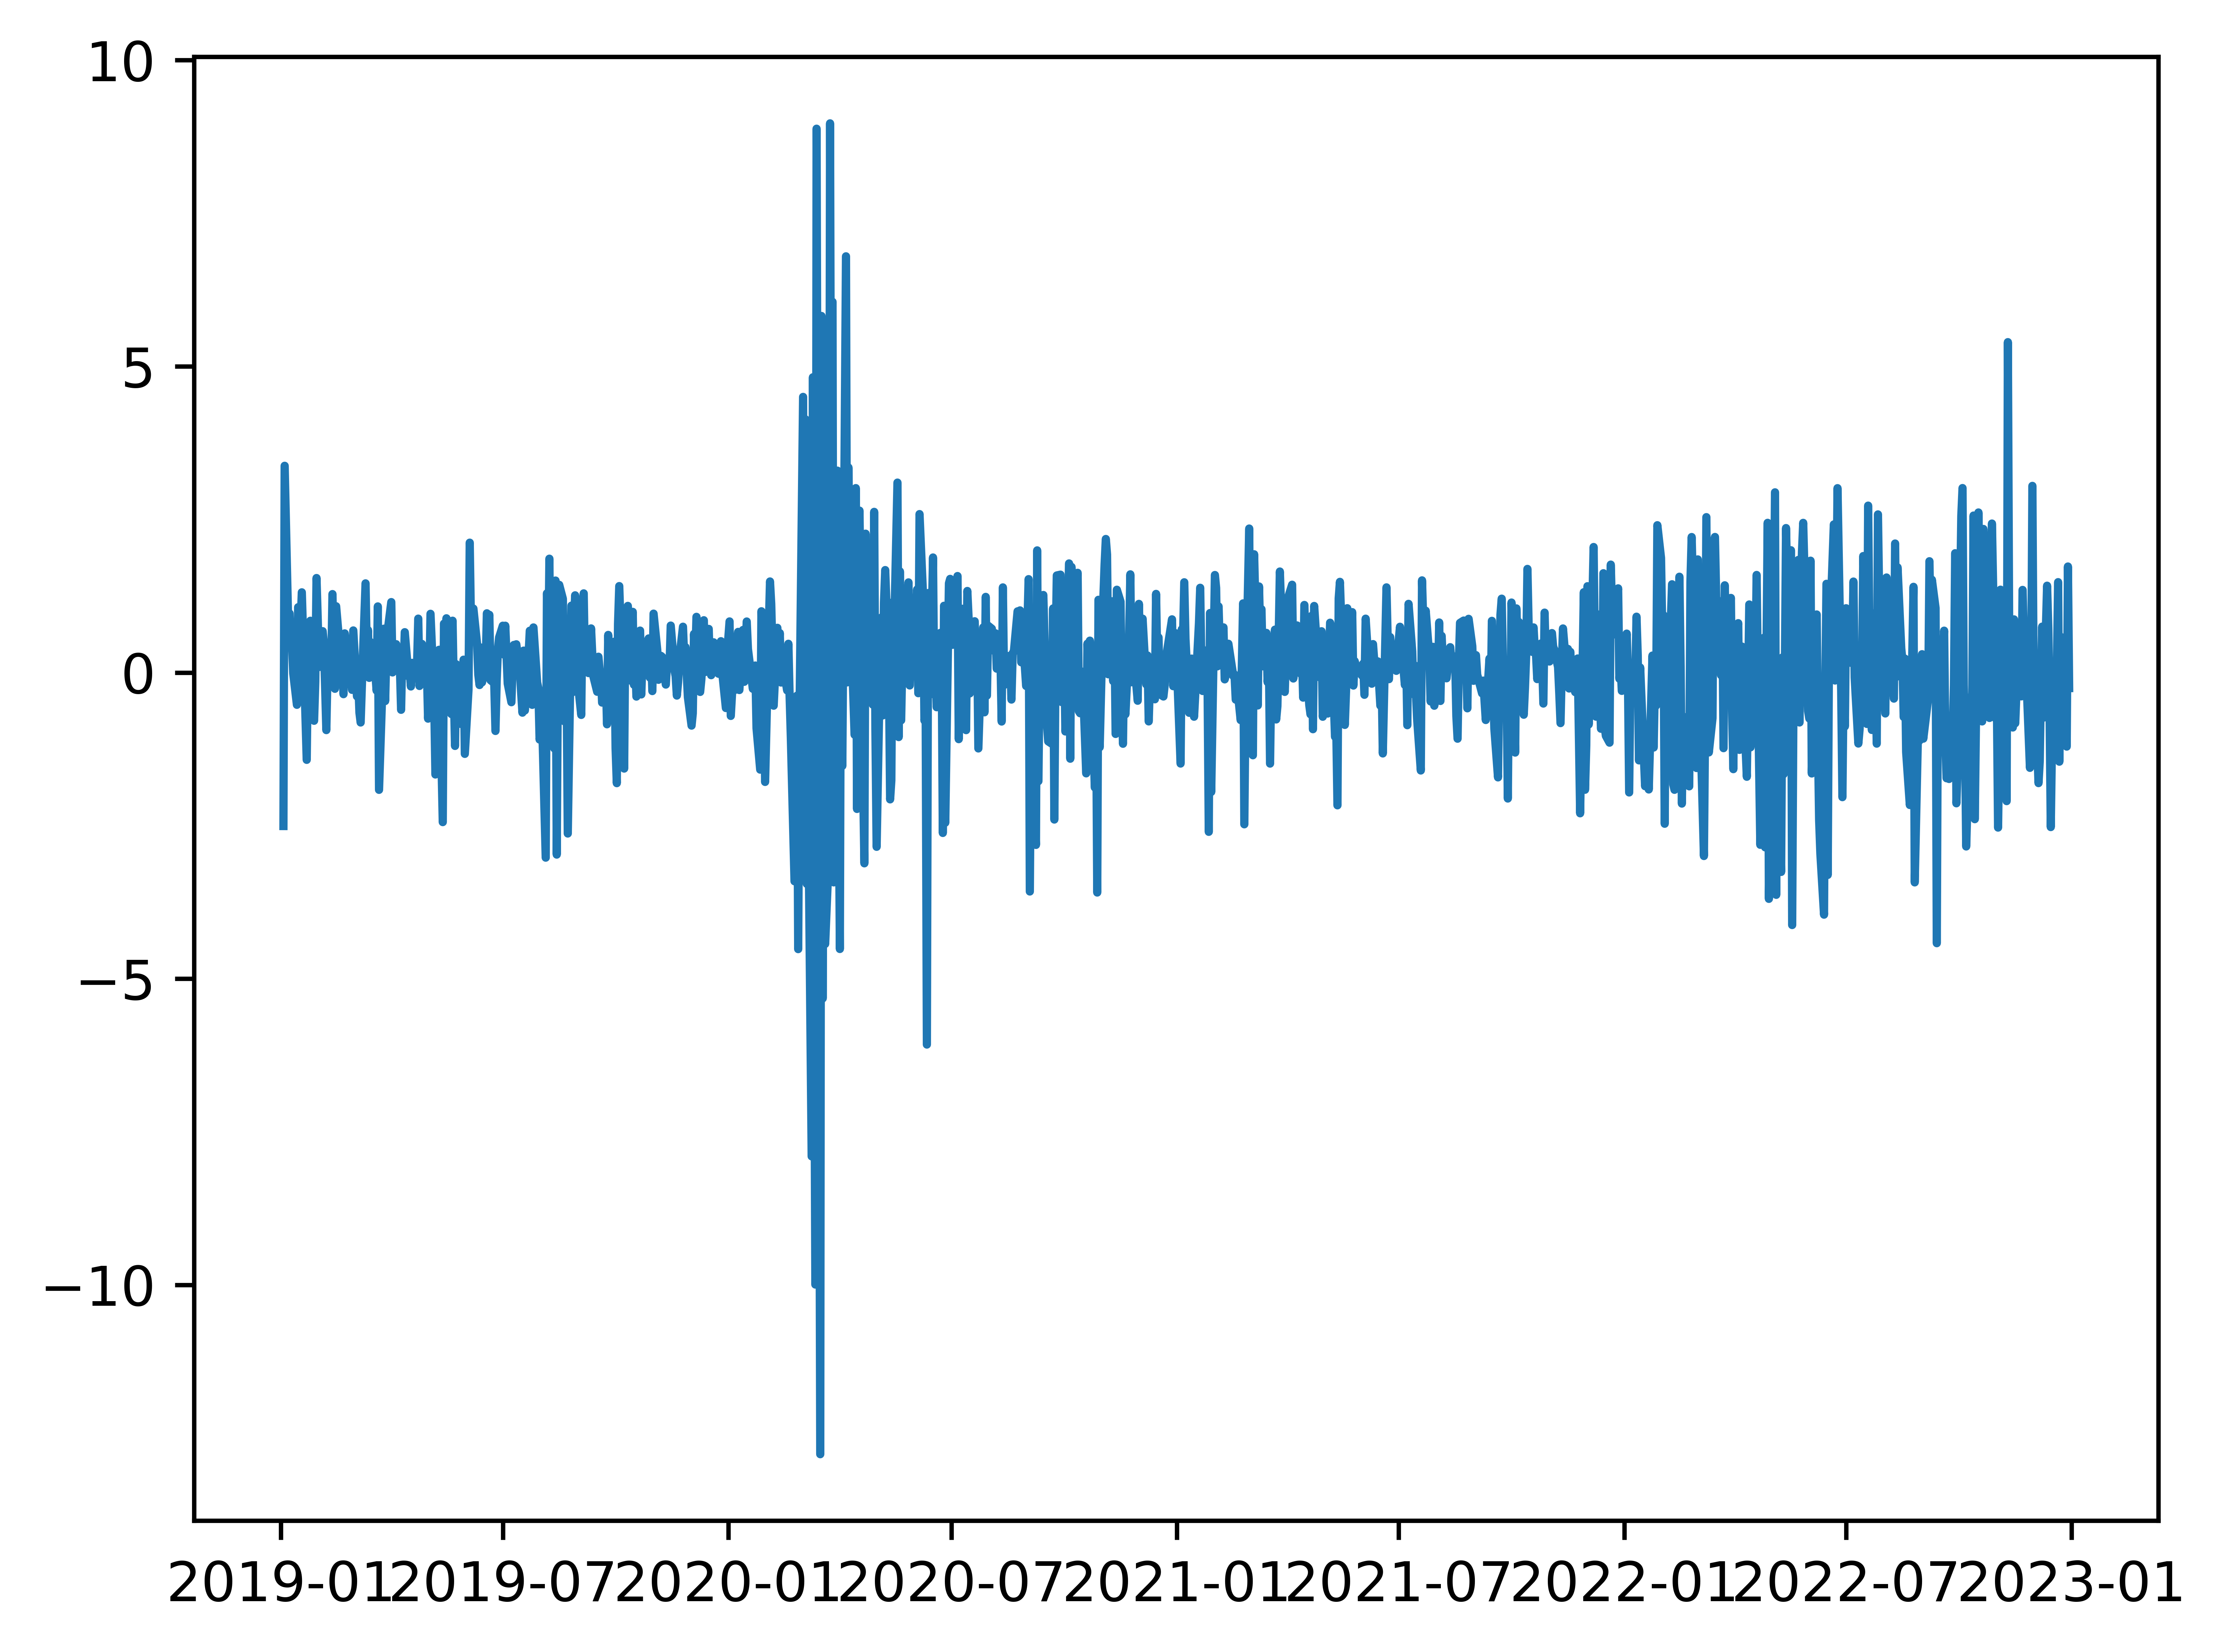

In [6]:
data = pd.DataFrame(yf.download(
    ticker,
    start=start,
    end=end,
    period='1d')['Close'])
data.rename(columns={'^GSPC': 'Adj Close'}, inplace=True)
data['r'] = np.log(data['Adj Close']).diff()*100 # log returns
data.dropna(axis=0, inplace=True)
plt.plot(data.index, data['r'])
plt.show()

 $$\text{Simple return: } r_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100 $$

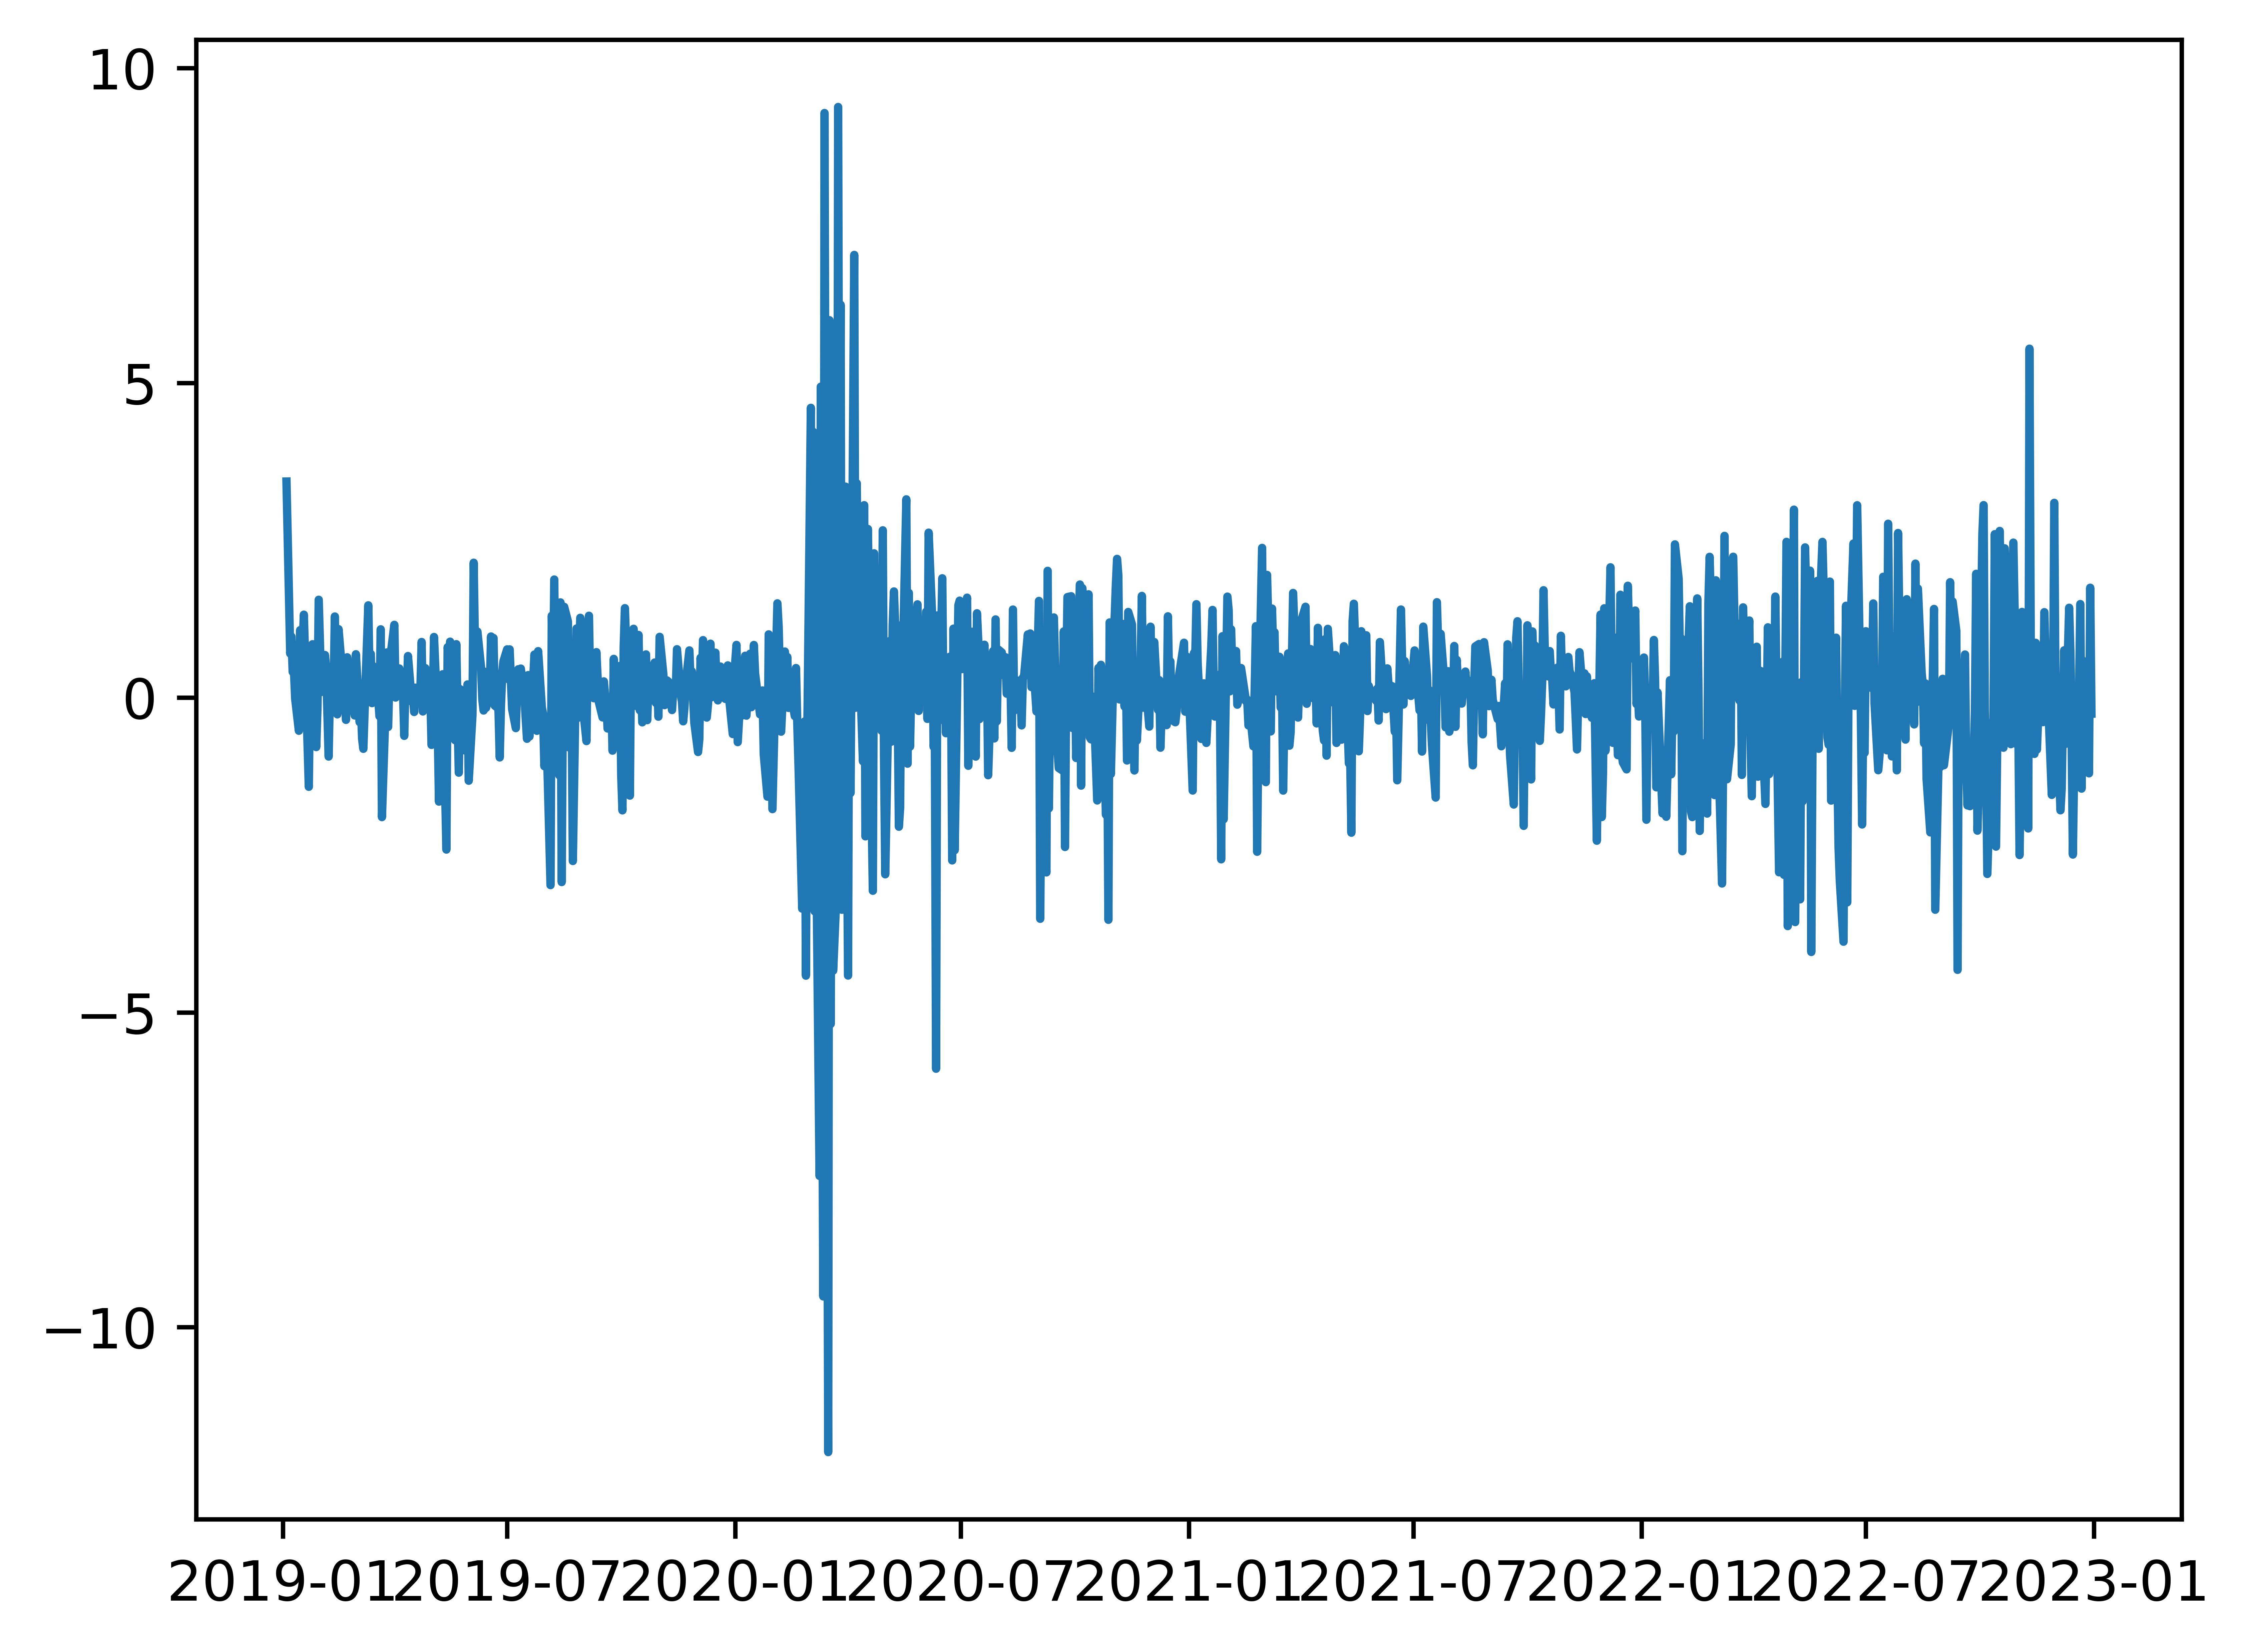

In [7]:
data['simple_r'] = data['Adj Close'].pct_change()*100

plt.plot(data.index, data['simple_r'])
plt.show()

## Rolling Window Volatility (Moving Standard Deviation)

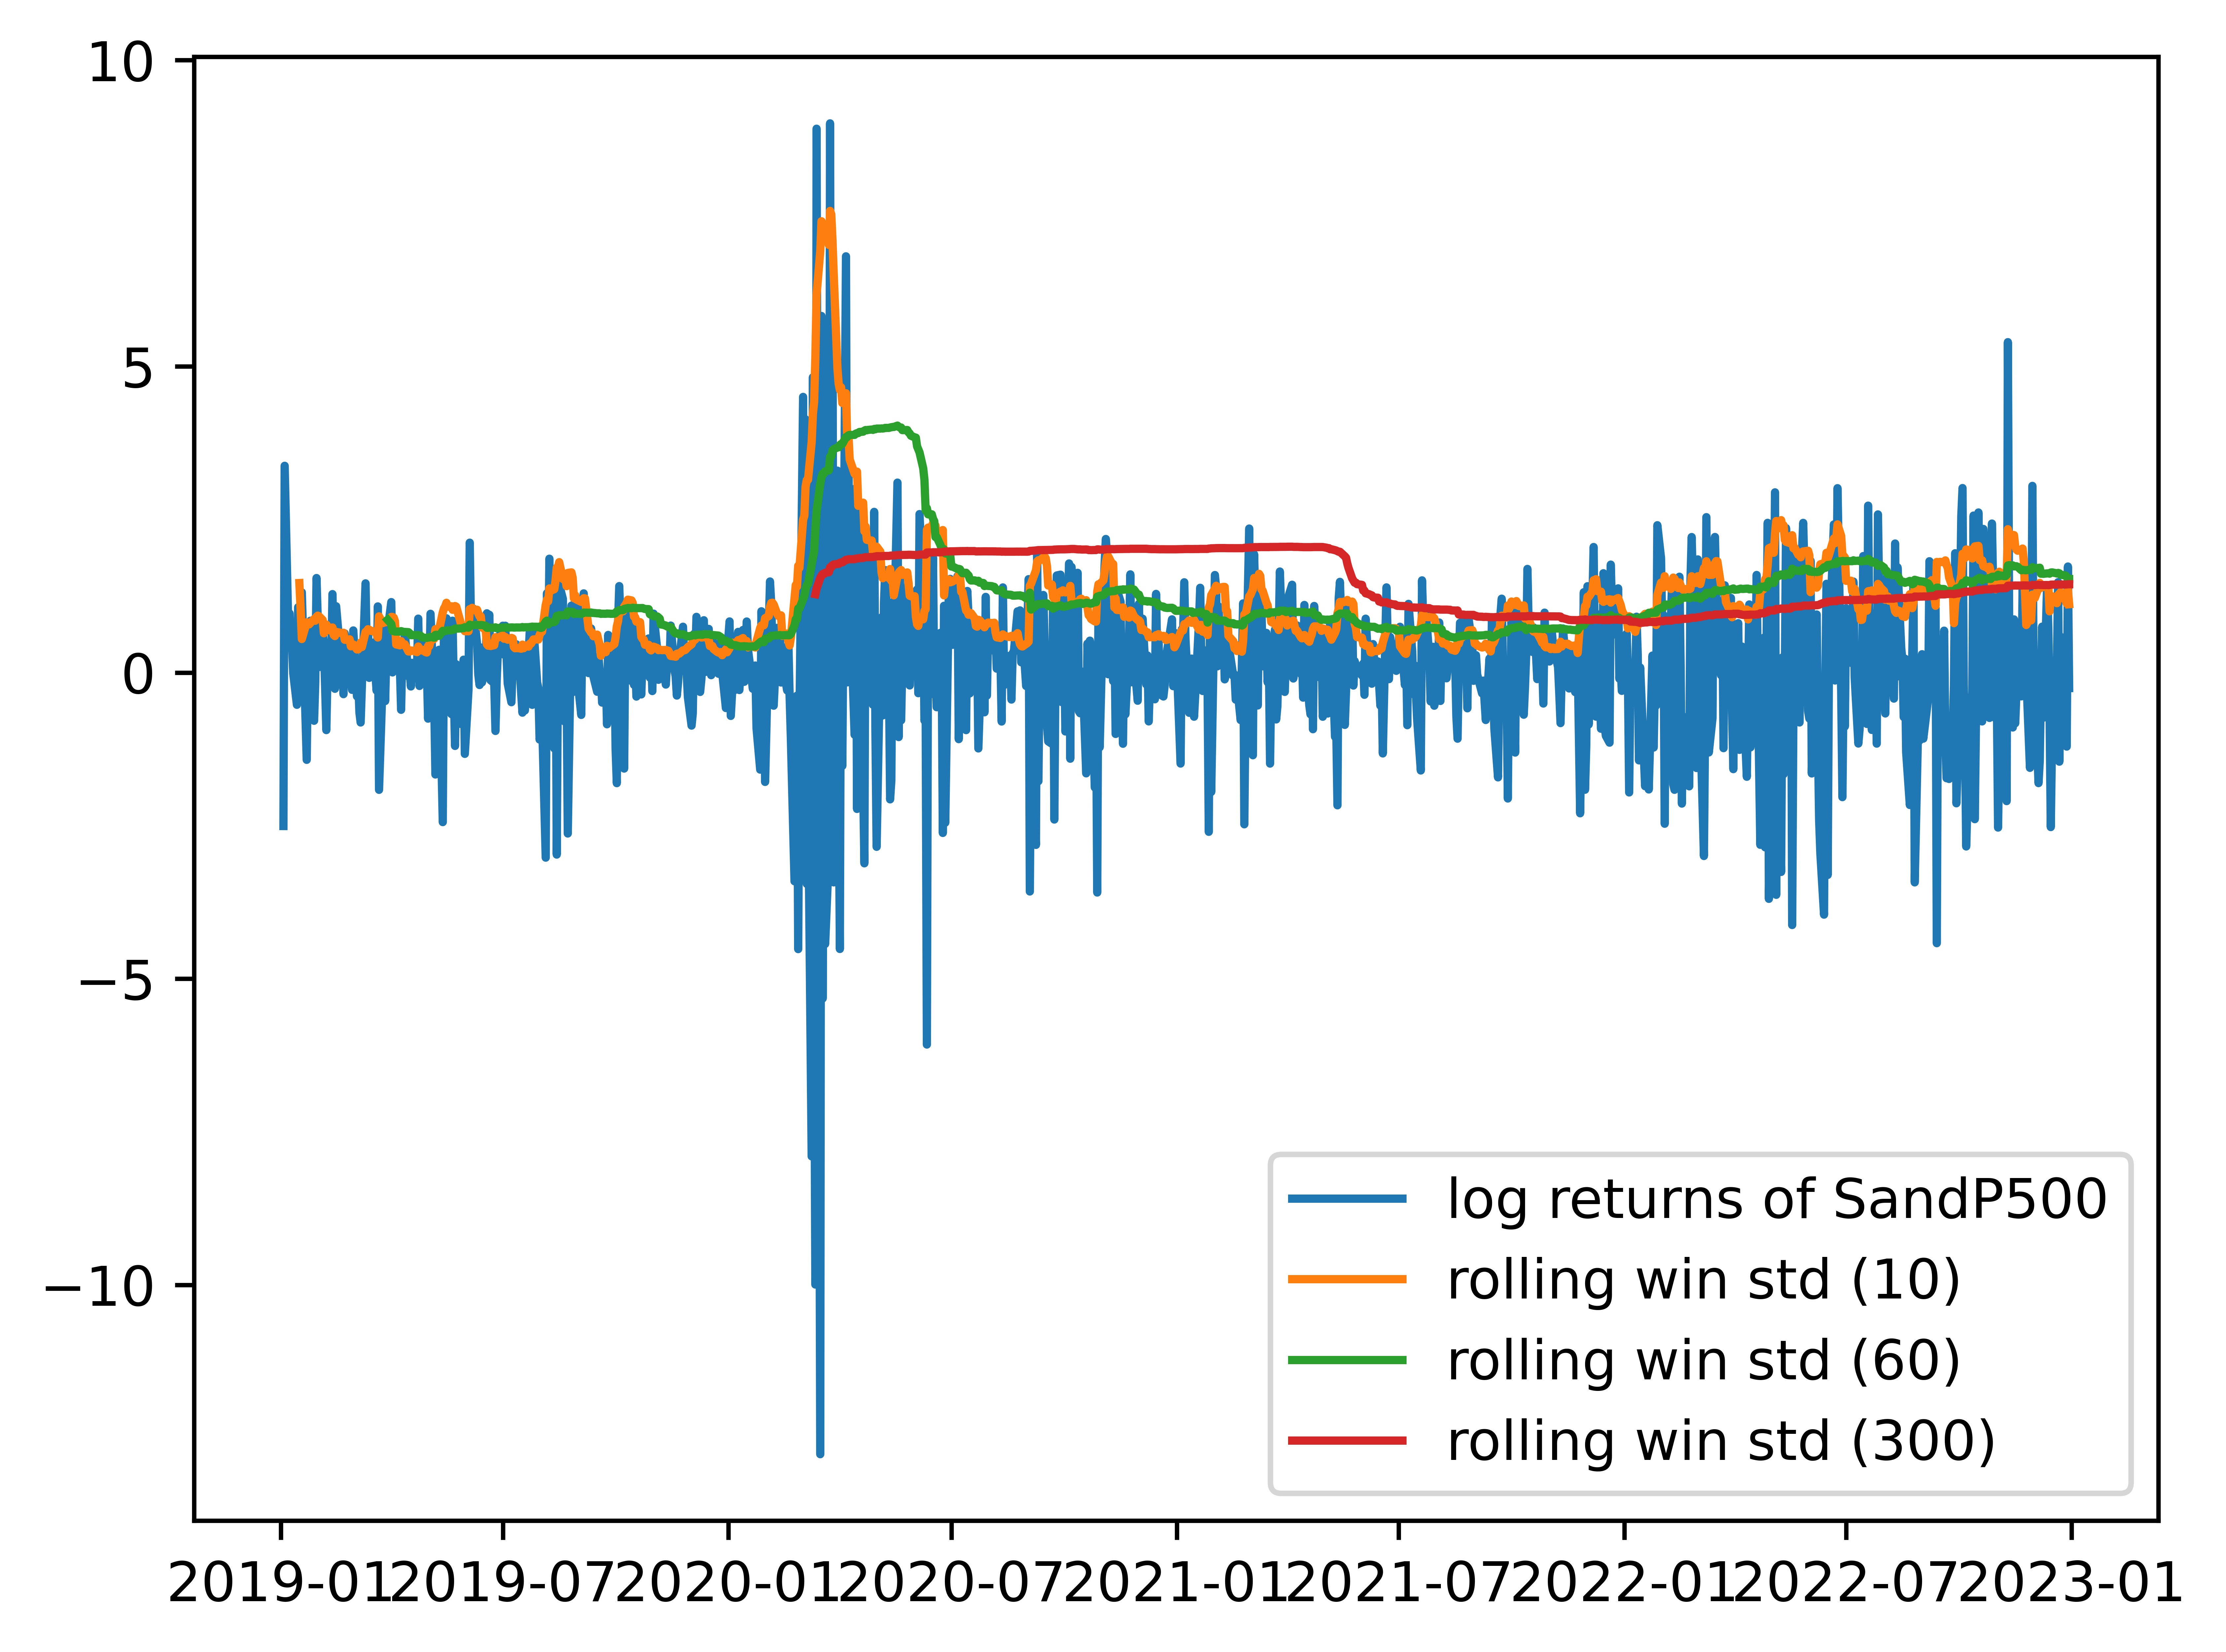

In [8]:
std10 = data['r'].rolling(10).std()
std60 = data['r'].rolling(60).std()
std300 = data['r'].rolling(300).std()

plt.plot(data.index, data['r'], label='log returns of SandP500')
plt.plot(data.index, std10, label='rolling win std (10)')
plt.plot(data.index, std60, label='rolling win std (60)')
plt.plot(data.index, std300, label='rolling win std (300)')
plt.legend()
plt.show()

In [9]:
arch1 = arch_model(data['r'], p=1, q=0, vol='GARCH').fit()
print(arch1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5548.519903901562
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3038.72577620337
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1995.7559488088214
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1649.2557455919296
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1642.4990993294632
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1641.7027056658003
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1641.6702363614058
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1641.6694443957872
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1641.6693389681225
Iteration:     10,   Func. Count:     49,   Neg. LLF: 1641.6693368322751
Iteration:     11,   Func. Count:     52,   Neg. LLF: 1641.6693368322972
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1641.6693368322751
            Iterations: 11
            Function evaluations: 52
            Gradient evalua

In [10]:
arch1_cond_vol = arch1.conditional_volatility

garch11 = arch_model(data['r'], p=1, q=1, vol='GARCH').fit()
print(garch11.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6429.303306544499
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6099069278.230297
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1840.447088371055
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1503.1194020955513
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1503.2172086868236
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1502.506436450949
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1502.3964688207857
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1502.3957340827187
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1502.3957340829916
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1502.3957340827187
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      r   R-squared:          

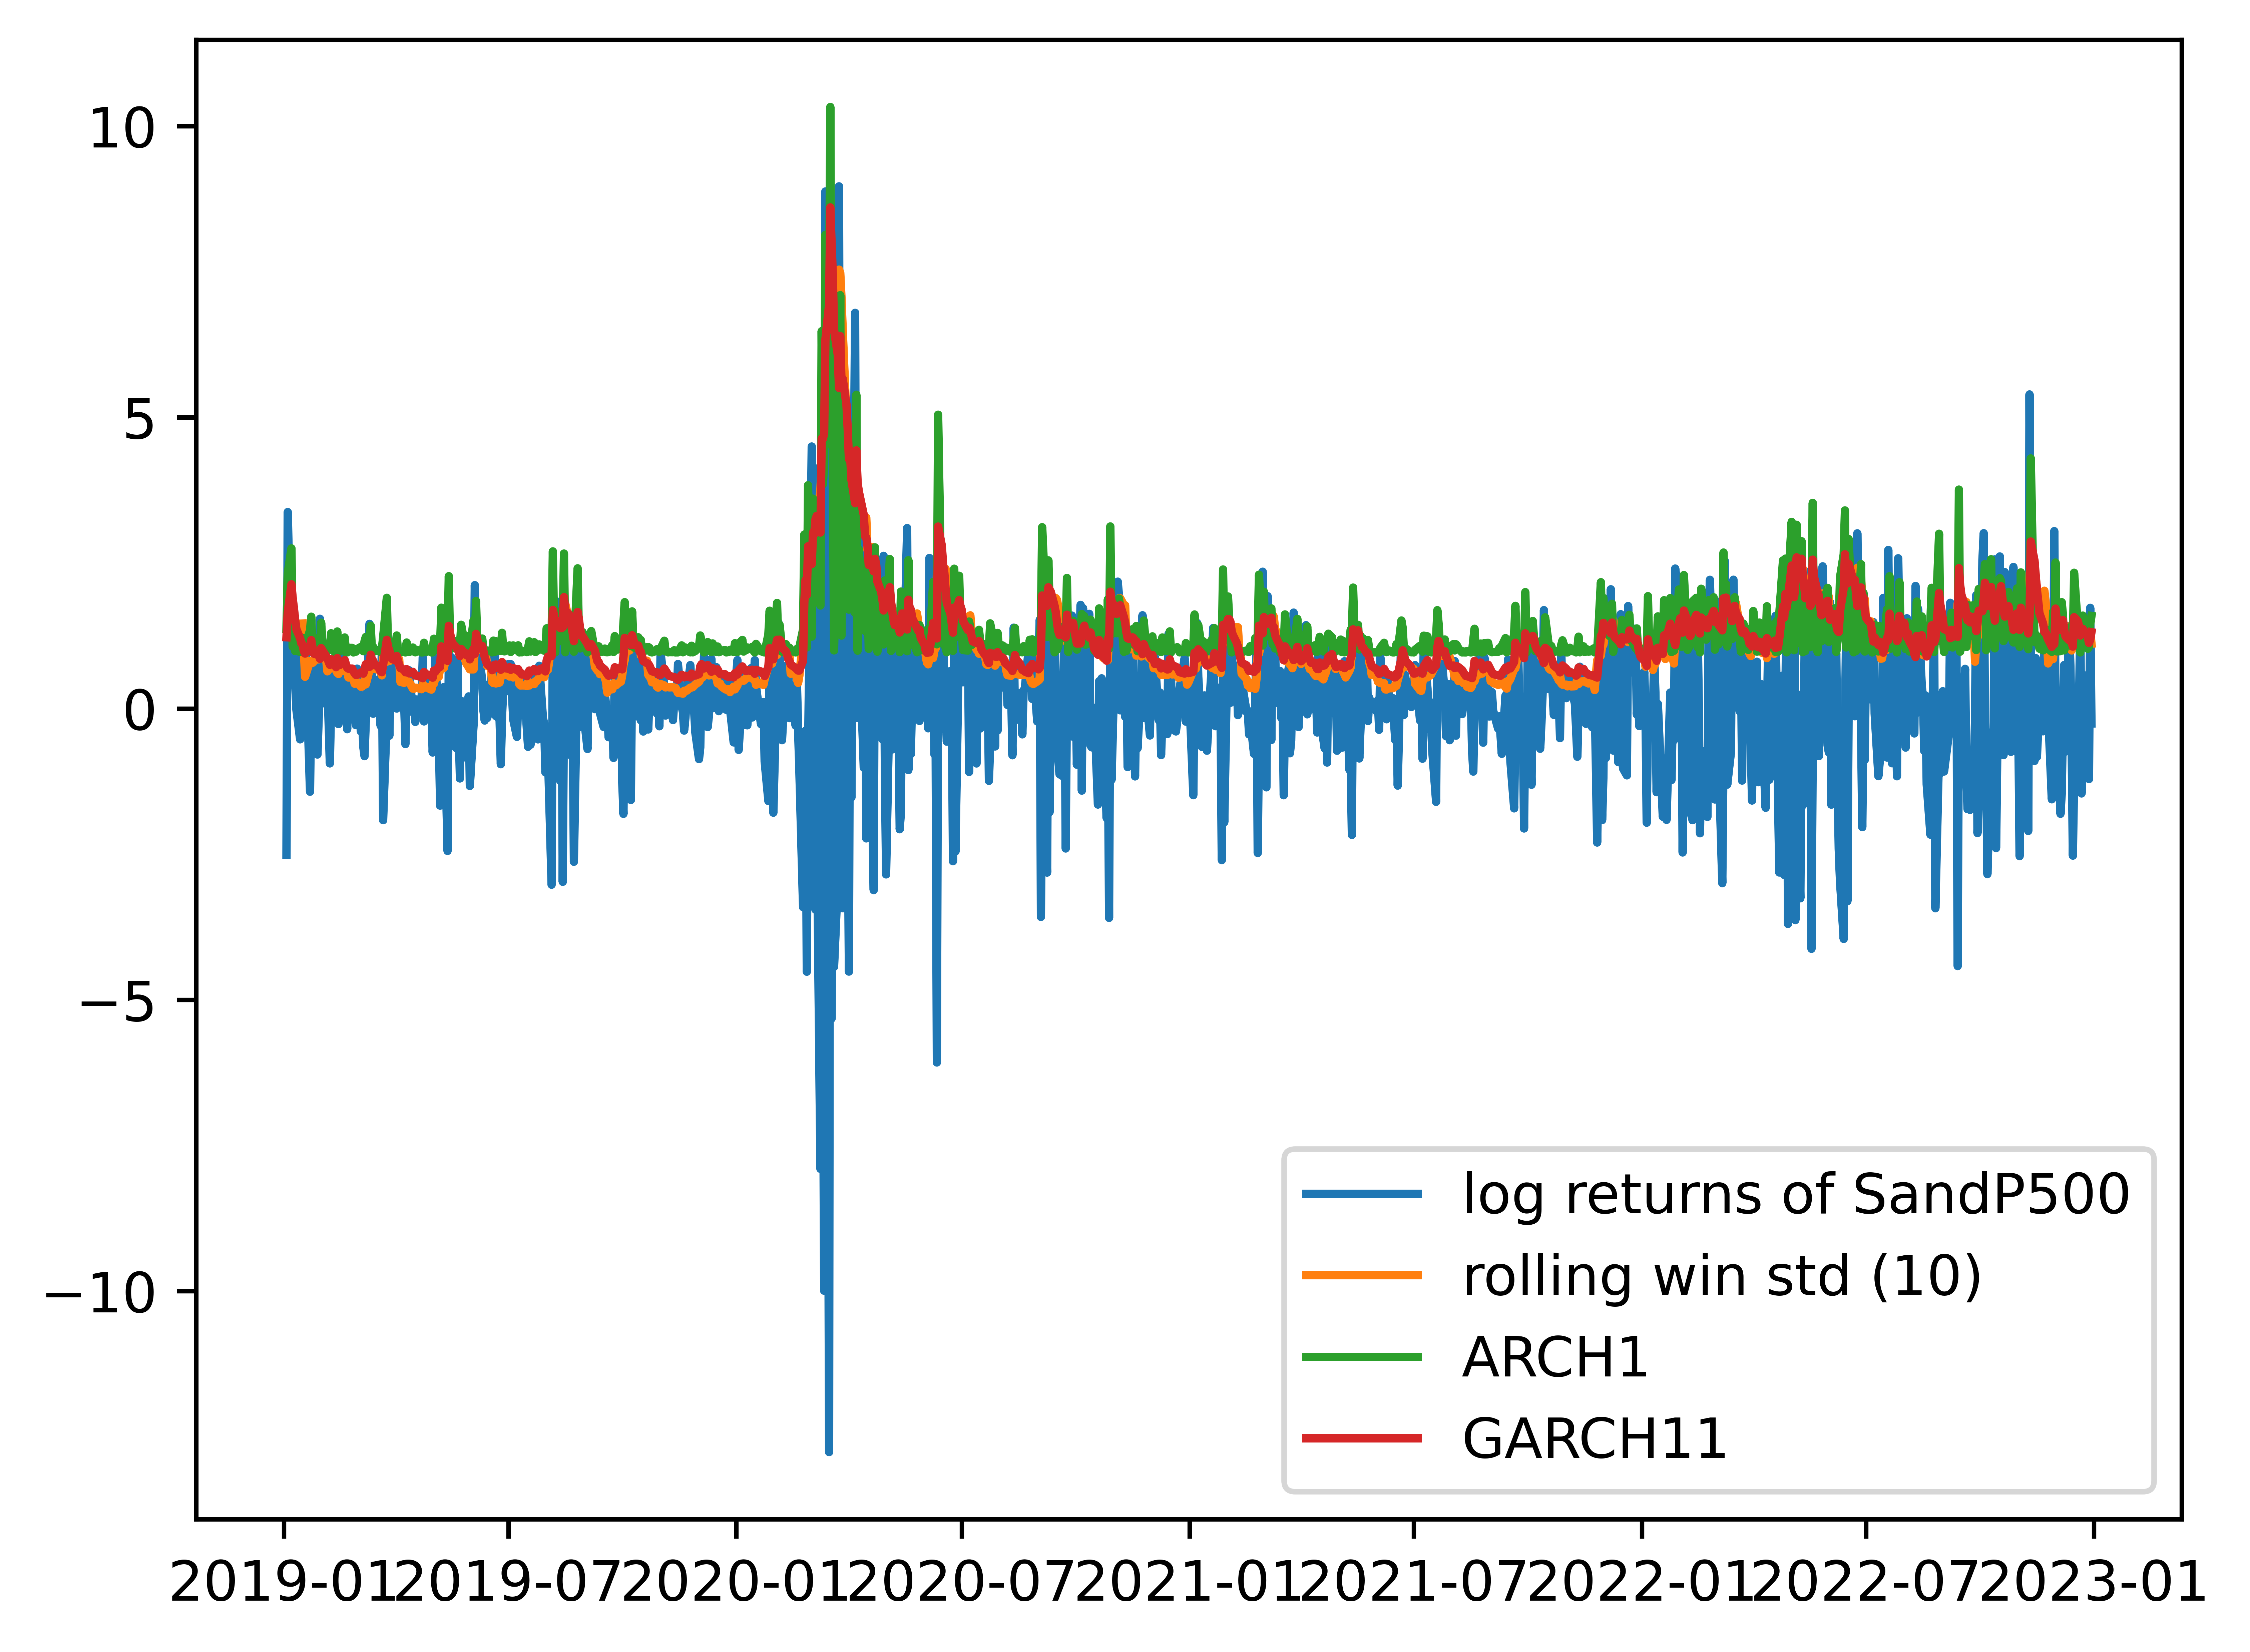

In [11]:
garch11_cond_vol = garch11.conditional_volatility

plt.plot(data.index, data['r'], label='log returns of SandP500')
plt.plot(data.index, std10, label='rolling win std (10)')
# plt.plot(data.index, std60, label='rolling win std (60)')
plt.plot(data.index, arch1_cond_vol, label='ARCH1')
plt.plot(data.index, garch11_cond_vol, label='GARCH11')
plt.legend()
plt.show()

# Choosing the Best Model (Using BIC)

In [12]:
BIG = 100000000
for p in [1, 2, 3]:
    for q in [0, 1, 2, 3]:
        arch_model_choice = arch_model(data['r'], p=p, q=q).fit(disp=False)
        if arch_model_choice.bic < BIG:
            BIG = arch_model_choice.bic
            pstar = p
            qstar = q

print('Model chosen based on BIC:')
print('GARCH({0},{1}) for {2}'.format(qstar, pstar, name))

Model chosen based on BIC:
GARCH(1,1) for S and P 500


# Asymmetric models

GJR-GARCH(1,1,1)

In [13]:
GJR111 = arch_model(data['r'], p=1, q=1, o=1, vol='GARCH').fit()
print(GJR111.summary())

EGARCH111 = arch_model(data['r'], p=1, q=1, o=1, vol='EGARCH').fit()
print(EGARCH111.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 24555.69897448265
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4371381359.652847
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2017.645726336728
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1624.6254723333152
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1496.1814678831333
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1747.979472078492
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1495.4258642521959
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1495.425842473614
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1495.4258391446604
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1495.4258377402534
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1495.4258377402393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1495.4258377402534
            Iterations: 11
            Function evaluations: 80
            Gradient evaluati